In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Environment_Impact_of_Food_Production_Analysis/'
file_name ='Food_Production.csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(file_path+file_name)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [6]:
df.columns

Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram (liters per kilogram)',
       'Scarcity-weighted water use per 100g protein 

In [7]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


## What is the relationship between Emission Stages?

In [9]:
cols_to_plot = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']
correlation_matrix = df[cols_to_plot].corr()

In [10]:
high_correlation = correlation_matrix[(correlation_matrix > 0.6) | (correlation_matrix < -0.6)]

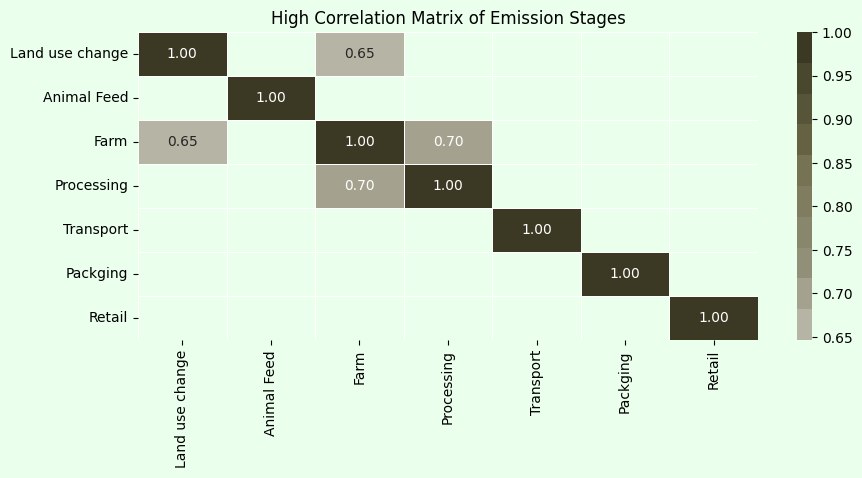

In [12]:
color_map = ['#B6B4A4', '#A4A28E', '#918F77', '#88866C', '#7F7C60', '#767355', '#656244', '#575539', '#49472E', '#3B3923']


plt.rcParams['axes.facecolor'] = '#EBFFED'
plt.rcParams['figure.facecolor'] = '#EBFFED'

plt.figure(figsize=(10, 4))
sns.heatmap(high_correlation, annot=True, cmap=color_map, fmt=".2f", linewidths=.5)
plt.title('High Correlation Matrix of Emission Stages')
plt.show()

## What is the Distribution of Total Emissions for all Food Products ?

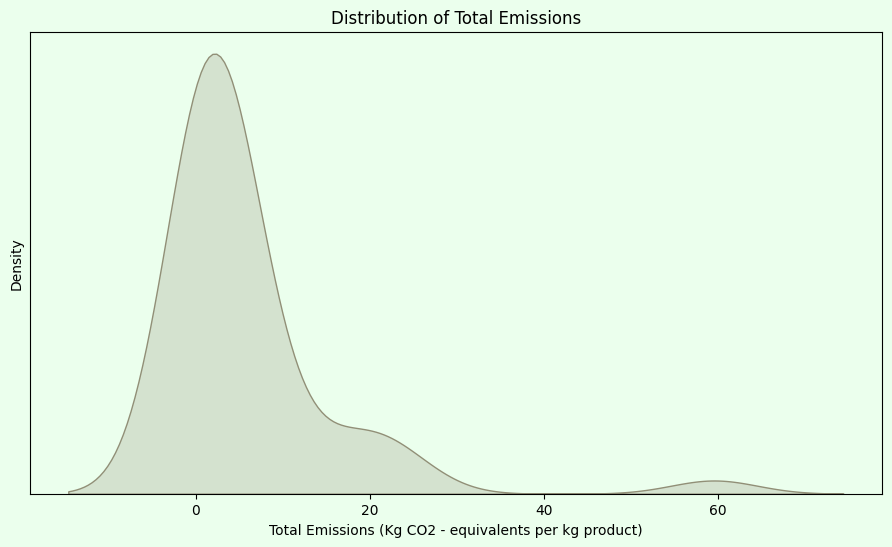

In [13]:
plt.rcParams['axes.facecolor'] = '#EBFFED'
plt.rcParams['figure.facecolor'] = '#EBFFED'

plt.figure(figsize=(11, 6))
ax = sns.kdeplot(df['Total_emissions'], fill=True, color='#918F77')
plt.title('Distribution of Total Emissions')
plt.xlabel('Total Emissions (Kg CO2 - equivalents per kg product)')
plt.ylabel('Density')

ax.set_yticks([])

plt.show()

The kernel density plot shows the distribution of 'Total_emissions'. The x-axis represents the total emissions, and the y-axis represents the density. The peak of the curve indicates where the majority of the data points are concentrated. In this plot, you can see that most food products have total emissions clustered around a lower value, with a long tail extending towards higher emission values, suggesting that a few food products have significantly higher total emissions than the rest.

## What are the top 10 Food Products per Total Emissions ?

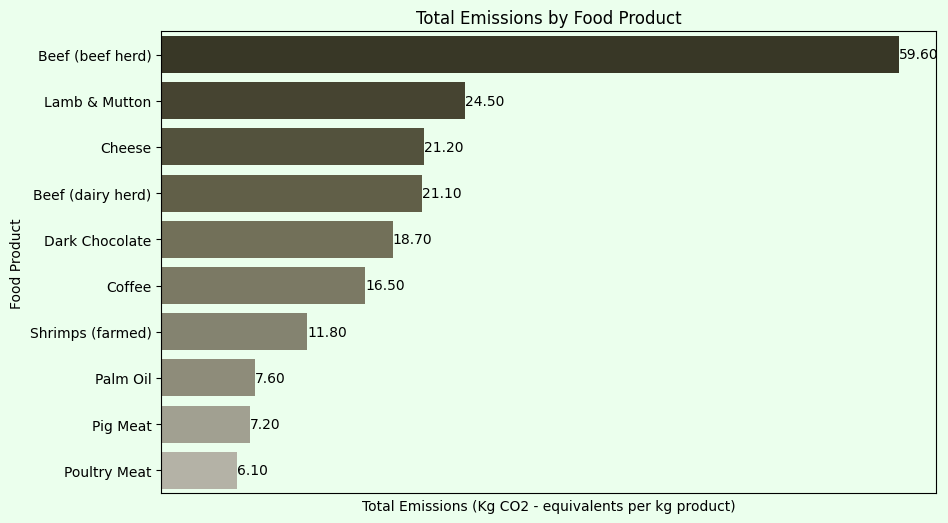

In [14]:
colors = ['#3B3923', '#49472E', '#575539', '#656244', '#767355', '#7F7C60', '#88866C', '#918F77', '#A4A28E', '#B6B4A4']

plt.rcParams['axes.facecolor'] = '#EBFFED'
plt.rcParams['figure.facecolor'] = '#EBFFED'

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df.sort_values(by='Total_emissions', ascending=False)[:10], x='Total_emissions', y='Food product', palette=colors)
plt.title('Total Emissions by Food Product')
plt.xlabel('Total Emissions (Kg CO2 - equivalents per kg product)')
plt.ylabel('Food Product')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

ax.set_xticks([])

plt.show()

## Which stages of the Supply Chain contribute mostly to Total Emissions ?

In [ ]:
cols_to_plot = ['Land use change', 'Animal Feed', 'Farm', 'Processing', 'Transport', 'Packging', 'Retail']
total_emissions_df = df[cols_to_plot].sum().reset_index(name='Total Emissions')
total_emissions_df.rename(columns={'index': 'Activity'}, inplace=True)
total_emissions_df.sort_values(by='Total Emissions', ascending=False, inplace=True)
total_emissions_df['Pie Activity'] = total_emissions_df['Activity'].apply(lambda x: x if x in ['Land use change', 'Animal Feed', 'Farm'] else 'Other')
total_emissions_df.reset_index(drop=True, inplace=True)

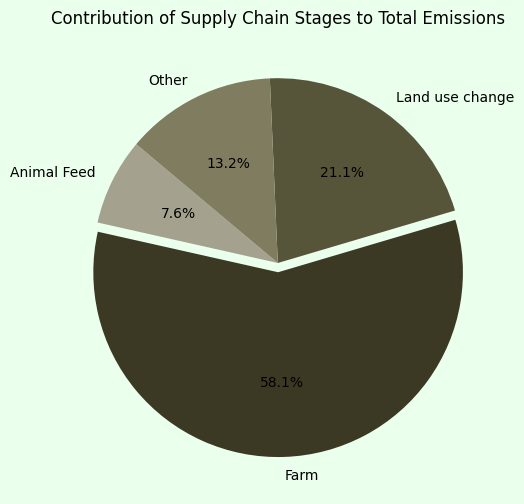

In [ ]:
filtered_df = total_emissions_df.groupby('Pie Activity').sum()
filtered_df.reset_index(drop=True, inplace=True)
filtered_df['Pie Activity'] = filtered_df['Activity'].apply(lambda x: x if x in ['Land use change', 'Animal Feed', 'Farm'] else 'Other')

# declaring exploding pie
explode = [0, 0.05, 0, 0.0]

colors = ['#A4A28E', '#3B3923', '#575539', '#7F7C60']

plt.rcParams['axes.facecolor'] = '#EBFFED'
plt.rcParams['figure.facecolor'] = '#EBFFED'

plt.figure(figsize=(10, 6))
plt.pie(filtered_df['Total Emissions'], labels=filtered_df['Pie Activity'], autopct='%1.1f%%', explode=explode, startangle=140, colors=colors)
plt.title('Contribution of Supply Chain Stages to Total Emissions')
plt.show()

# Plotting Sustainability Scores

# 🌱 Sustainability Index: A Normalized Composite Metric

This index computes a **composite sustainability score** for food products by normalizing environmental impact metrics and averaging them equally.  
**Lower score = More sustainable**

---

## 📐 Mathematical Definition

### 1. **Min-Max Normalization (per metric)**

Each environmental impact metric $ x_i $ is normalized to the range $[0, 1]$:

$$
x_i^{\text{norm}} = \frac{x_i - \min(x_i)}{\max(x_i) - \min(x_i)}
$$

> 📌 *Assumption: Lower values indicate better (more sustainable) performance.*

---

### 2. **Sustainability Score (Equal Weighting)**

The final score is the **arithmetic mean** of all normalized metrics:

$$
\text{Sustainability Score} = \frac{1}{n} \sum_{i=1}^{n} x_i^{\text{norm}}
$$

Where:
- $ n $ = number of impact metrics
- $ x_i^{\text{norm}} $ = normalized value of the $ i $-th environmental metric

---

### 3. **Ranking**

Products are ranked by ascending Sustainability Score:

$$
\text{Rank} = \operatorname{argsort}\left( \text{Sustainability Score} \right)
$$

→ Top-ranked = Most sustainable

---

In [ ]:
def Calculate_Sustainability_Score(df, impact_cols):
  # Min-Max normalization: (x - min) / (max - min)
  # Lower = better
  df_norm = df[['Food product']].copy()

  for col in impact_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    norm_col = f"{col} (normalized)"
    df_norm[norm_col] = (df[col] - min_val) / (max_val - min_val)

  # List of normalized columns
  norm_cols = [col for col in df_norm.columns if '(normalized)' in col]

  # Equal weights: average of all normalized impacts
  df_norm['Sustainability Score'] = df_norm[norm_cols].mean(axis=1)

  # Sort: lowest score = most sustainable
  df_ranked = df_norm.sort_values('Sustainability Score').reset_index(drop=True)

  return df_ranked[['Food product', 'Sustainability Score'] + norm_cols]



## Which Food Products are Sustainable Per thier Protien Levels

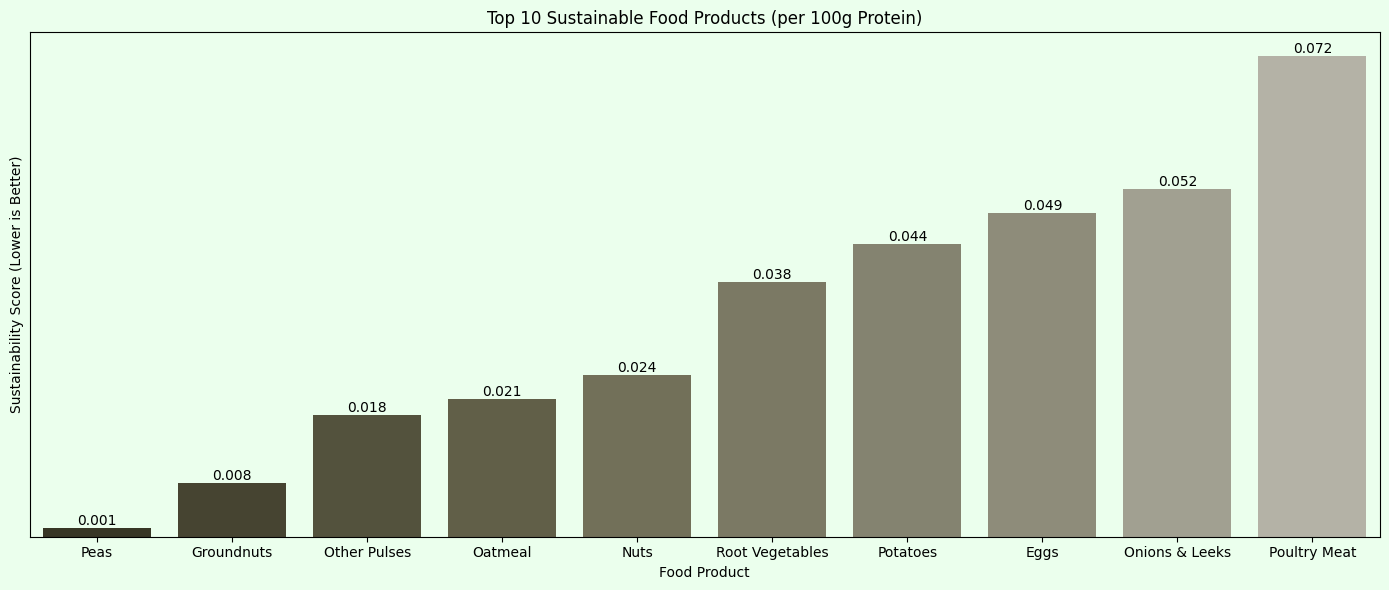

In [ ]:
# Columns to include in sustainability score
protien_cols = [
    'Land use per 100g protein (m² per 100g protein)',
    'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
    'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
]

df_protien = Calculate_Sustainability_Score(df, protien_cols)

colors = ['#3B3923', '#49472E', '#575539', '#656244', '#767355', '#7F7C60', '#88866C', '#918F77', '#A4A28E', '#B6B4A4']

plt.rcParams['axes.facecolor'] = '#EBFFED'
plt.rcParams['figure.facecolor'] = '#EBFFED'

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_protien.sort_values(by='Sustainability Score', ascending=True)[:10], y='Sustainability Score', x='Food product', palette=colors)
plt.title('Top 10 Sustainable Food Products (per 100g Protein)')
plt.xlabel('Food Product')
plt.ylabel('Sustainability Score (Lower is Better)')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

ax.set_yticks([])

plt.tight_layout()
plt.show()

## Which Food Products are Sustainable Per thier Caloric Levels

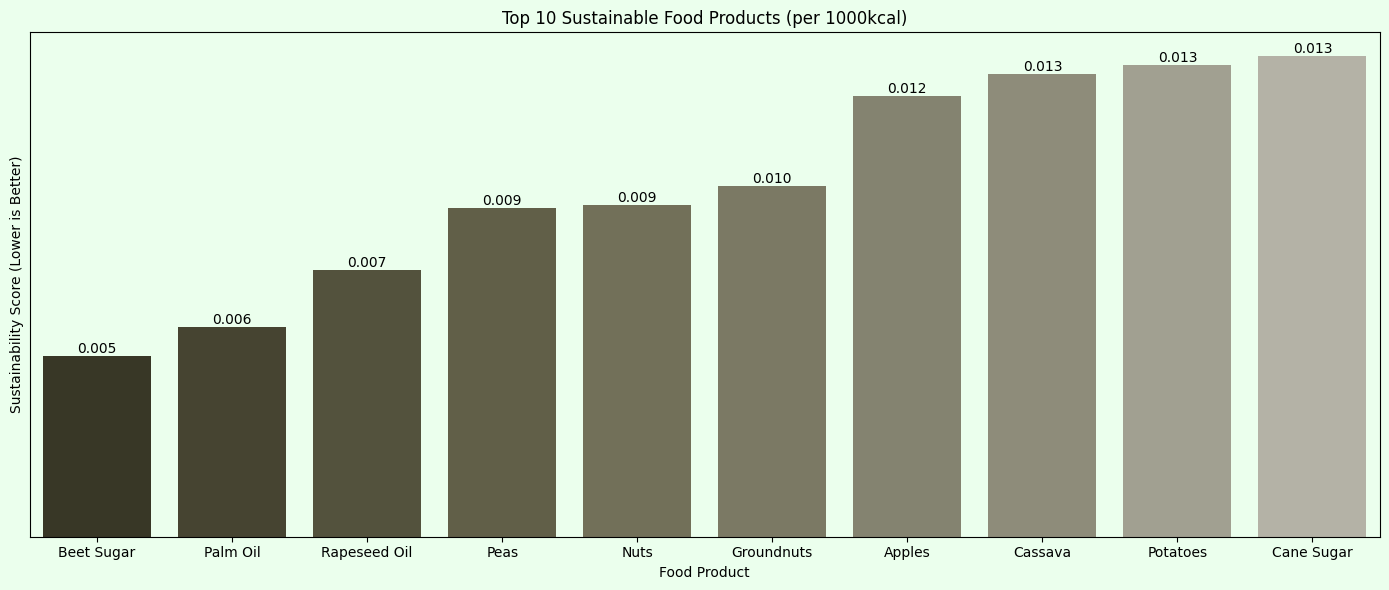

In [ ]:
# Columns to include in sustainability score
calorie_cols = [
    'Land use per 1000kcal (m² per 1000kcal)',
    'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
    'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)'
]

df_calorie = Calculate_Sustainability_Score(df, calorie_cols)

colors = ['#3B3923', '#49472E', '#575539', '#656244', '#767355', '#7F7C60', '#88866C', '#918F77', '#A4A28E', '#B6B4A4']

plt.rcParams['axes.facecolor'] = '#EBFFED'
plt.rcParams['figure.facecolor'] = '#EBFFED'

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_calorie.sort_values(by='Sustainability Score', ascending=True)[:10], y='Sustainability Score', x='Food product', palette=colors)
plt.title('Top 10 Sustainable Food Products (per 1000kcal)')
plt.xlabel('Food Product')
plt.ylabel('Sustainability Score (Lower is Better)')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

ax.set_yticks([])

plt.tight_layout()
plt.show()

## Which Food Products are Sustainable Per thier Weight?

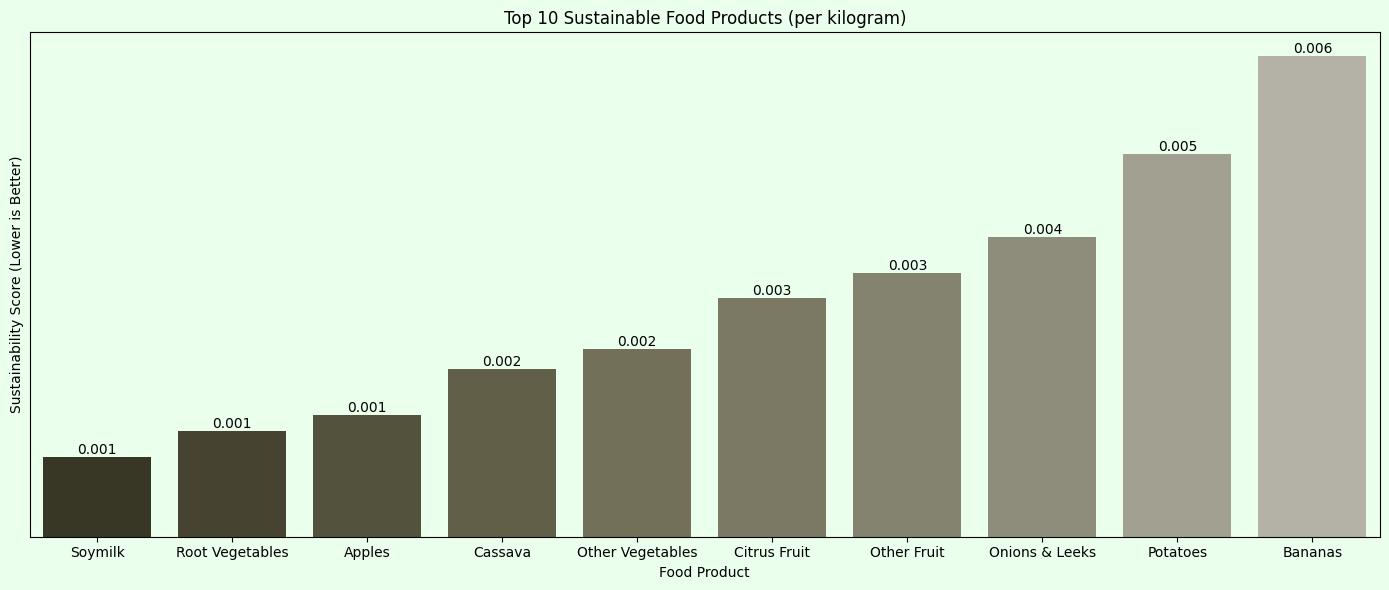

In [ ]:
weight_cols = [
    'Land use per kilogram (m² per kilogram)',
    'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
]

df_weight = Calculate_Sustainability_Score(df, weight_cols)

colors = ['#3B3923', '#49472E', '#575539', '#656244', '#767355', '#7F7C60', '#88866C', '#918F77', '#A4A28E', '#B6B4A4']

plt.rcParams['axes.facecolor'] = '#EBFFED'
plt.rcParams['figure.facecolor'] = '#EBFFED'

plt.figure(figsize=(14, 6))
ax = sns.barplot(data=df_weight.sort_values(by='Sustainability Score', ascending=True)[:10], y='Sustainability Score', x='Food product', palette=colors)
plt.title('Top 10 Sustainable Food Products (per kilogram)')
plt.xlabel('Food Product')
plt.ylabel('Sustainability Score (Lower is Better)')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f')

ax.set_yticks([])

plt.tight_layout()
plt.show()